## COVID-19 Daily Analysis Table  
  - This-document: https://github.com/infchg/COVID-19/JH-calculate-daily.ipynb
  - HOW-TO-USE: see results or re-calculate on your own Notebook (Jupyter, Mybinder, Azure, ... )
  - RESULTS: WARNING ON COUNTRIES BY COVID DAILY DEATH RATES
      - rankings and trends on the worst daily deaths by country evaluating last 7 days
  - References:
      - Web charts:  https://dasn.herokuapp.com/covidzoom and https://dasn.herokuapp.com/covid19
      - wolfram & azure notebooks 
      - Data-source: John Hopkins, Stats by Country,  https://github.com/CSSEGISandData/
  - LOOKING FOR REGIONAL SOURCES (Estado, Staat, CCAA, Canton, ...) IN ORDER TO CALCULATE BY AREA

In [16]:
try:  ## This table sumarizes the daily deaths by country (calculations below)   %store df9  
    display(df9.transpose().tail(3) )
    print("worst daily deaths by country evaluating last 7 days:")
    display(df9.transpose().tail(9).head(9).mean(axis=0).sort_values(ascending=False).head(7) )
except NameError:
    print("Click Run on this cell only after the RUN ALL completes all calculations")

Country/Region,US,Brazil,United Kingdom,Mexico,Italy,Peru,Russia,India,Spain,Ecuador,Canada,Belgium,Germany,Turkey,Canada,Iran
5/14/20,1779,759,428,257,262,98,93,98,217,4,131,60,23,55,32,71
5/15/20,1632,963,384,290,242,125,113,104,138,256,50,56,13,48,24,48
5/16/20,1224,700,468,278,153,131,119,118,104,94,82,46,41,41,37,35


worst daily deaths by country evaluating last 7 days:


Country/Region
US                1454.666667
Brazil             719.111111
United Kingdom     427.888889
Mexico             231.555556
Italy              200.555556
Spain              165.888889
Ecuador            114.888889
dtype: float64

### How is this daily Calculus performed :   https://github.com/infchg/COVID-19
  - calculations in iPython at  https://github.com/infchg/COVID-19/JH-calculate-daily.ipynb
      - data source: John Hopkins https://github.com/CSSEGISandData/COVID-19/
      - thanks to resources by http://Jupyter.org  http://MyBinder.org  http://Heroku.com and above
  - LOOKING FOR REGIONAL SOURCES (Estado, Staat, CCAA, Canton, ...) IN ORDER TO CALCULATE BY AREA

In [2]:
!pip install pandas seaborn
# initial installations 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 10.0 MB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 25.4 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 32.1 MB/s eta 0:00:01
     |████████████████████████████████| 20.2 MB 38 kB/s s eta 0:00:01         | 7.8 MB 22.7 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 46.9 MB/s eta 0:00:01     |█████████████████████████████▋  | 11.5 MB 46.9 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 121 kB/s  eta 0:00:01
     |████████████████████████████████| 88 kB 11.7 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 8.5 MB/s  eta 0:00:01


In [3]:
 ##JH Source THIS IS THE SOURCE OF ALL CALCULATIONS IN THIS PAGE
! curl -OL https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   213  100   213    0     0   1704      0 --:--:-- --:--:-- --:--:--  1704
100 79863  100 79863    0     0   301k      0 --:--:-- --:--:-- --:--:-- 4306k


In [4]:
# ! egrep -e ',[0-9]{3,}$' -e ^Provi  -e ',[6-9].$' tim*dea*csv > over50.csv
! egrep -e ',[^,][^,][^,]+$' -e ^Provi   tim*dea*csv > over50.csv
import pandas as pd
df=pd.read_csv('over50.csv')
df.set_index('Country/Region',inplace=True)  # .T
type(df)

pandas.core.frame.DataFrame

In [5]:
cols20 = df.columns[-13:].tolist()
idx = cols20 # cols21 = df.columns[-14:-1].tolist()
#display( )idx=['Country/Region']+cols20   #no need with set index
display(df.sort_values(by=[df.columns[-1]],ascending=False)[cols20] )

,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20
Country/Region,,,,,,,,,,,,,
US,68922,71064,73455,75662,77180,78795,79526,80682,82356,84119,85898,87530,88754
United Kingdom,28734,29427,30076,30615,31241,31587,31855,32065,32692,33186,33614,33998,34466
Italy,29079,29315,29684,29958,30201,30395,30560,30739,30911,31106,31368,31610,31763
Spain,25428,25613,25857,26070,26299,26478,26621,26744,26920,27104,27321,27459,27563
France,25168,25498,25772,25949,26192,26271,26341,26604,26951,27032,27381,27485,27483
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Malaysia,105,106,107,107,107,108,108,109,109,111,112,112,113
Kuwait,40,40,42,44,47,49,58,65,75,82,88,96,107
Bulgaria,78,80,84,84,86,90,91,93,95,96,99,102,105


In [6]:
#df['LastDay']=df[df.columns[-1]]-df[df.columns[-2]] 
df0=df[idx].copy()  #()
type(df)
#for (coln, cold) in df.iteritems():
#    print(coln, '->', cold)
for i in range(1,13):
         df0[df0.columns[-i]] =    (df0[df.columns[-i]]-df0[df0.columns[-i-1]]) # casualties last day

## COVID Daily deaths 
May 9th warning on Brazil Mexico in addition to cited March-30th: US UK Italy Spain France   

In [7]:
df0.pop( df0.columns[0] )   # 0 
df9=df0.sort_values(by=[df.columns[-1]],ascending=False).head(16)
display(df9) 

,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20
Country/Region,,,,,,,,,,,,
US,2142,2391,2207,1518,1615,731,1156,1674,1763,1779,1632,1224
Brazil,571,650,602,827,639,467,530,808,779,759,963,700
United Kingdom,693,649,539,626,346,268,210,627,494,428,384,468
Mexico,236,197,257,199,193,112,108,353,294,257,290,278
Italy,236,369,274,243,194,165,179,172,195,262,242,153
Peru,100,89,94,87,100,75,72,96,112,98,125,131
Russia,95,86,88,98,104,88,94,107,96,93,113,119
India,127,92,104,96,116,111,82,121,136,98,104,118
Spain,185,244,213,229,179,143,123,176,184,217,138,104


In [8]:
print(','.join('Mr%.0f' %x for x in range(18,30+1))  ,'\ndata-datasets="')
print('"\ndata-datasets="'.join(','.join('%.0f' %x for x in y) for y in df9.values) )

Mr18,Mr19,Mr20,Mr21,Mr22,Mr23,Mr24,Mr25,Mr26,Mr27,Mr28,Mr29,Mr30 
data-datasets="
2142,2391,2207,1518,1615,731,1156,1674,1763,1779,1632,1224"
data-datasets="571,650,602,827,639,467,530,808,779,759,963,700"
data-datasets="693,649,539,626,346,268,210,627,494,428,384,468"
data-datasets="236,197,257,199,193,112,108,353,294,257,290,278"
data-datasets="236,369,274,243,194,165,179,172,195,262,242,153"
data-datasets="100,89,94,87,100,75,72,96,112,98,125,131"
data-datasets="95,86,88,98,104,88,94,107,96,93,113,119"
data-datasets="127,92,104,96,116,111,82,121,136,98,104,118"
data-datasets="185,244,213,229,179,143,123,176,184,217,138,104"
data-datasets="0,49,36,50,13,410,18,182,7,4,256,94"
data-datasets="118,112,121,94,61,142,85,118,89,131,50,82"
data-datasets="92,323,76,106,60,75,51,54,82,60,56,46"
data-datasets="0,282,117,118,39,20,92,77,123,23,13,41"
data-datasets="59,64,57,48,50,47,55,53,58,55,48,41"
data-datasets="59,55,47,58,61,25,37,64,31,32,24,37"
data-datasets="63,78,68,55,48,51,45,48,50,

In [9]:
dxy=df0.transpose()
display(dxy.tail(4)) #pivot('Country/Region')

Country/Region,Afghanistan,Algeria,Argentina,Austria,Bangladesh,Belarus,Belgium,Bolivia,Bosnia and Herzegovina,Brazil,...,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,Ukraine,United Arab Emirates,United Kingdom,US
5/13/20,5,7,10,1,19,4,82,14,3,779,...,1,13,184,147,3,58,14,3,494,1763
5/14/20,4,7,24,2,14,5,60,10,2,759,...,0,19,217,69,2,55,17,2,428,1779
5/15/20,17,7,3,2,15,5,56,12,6,963,...,0,9,138,117,6,48,20,2,384,1632
5/16/20,15,6,7,1,16,4,46,1,1,700,...,0,14,104,28,1,41,21,4,468,1224


In [10]:
#Worst 7 countries in daily deaths last week 
df9.transpose().tail(8).head(7).mean(axis=0).sort_values(ascending=False).head(7)    #1 Average for each row :

Country/Region
US                1478.571429
Brazil             706.428571
United Kingdom     393.857143
Mexico             229.571429
Italy              201.285714
Spain              165.714286
Ecuador            127.142857
dtype: float64

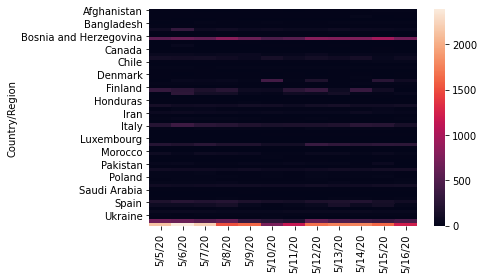

In [11]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df0)#, annot=True

###  Daily casualties Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 

68 2.4166666666666665


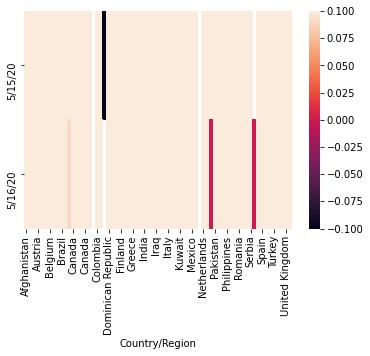

In [12]:
print( len(dxy.columns) ,dxy['Austria'].tail(20).mean() ) #   with ()   sns.heatmap(dxy)
drel=dxy.copy()
for r in drel.columns:
    #print (r,    drel[r].tail(5).mean() )
    drel[r] =  drel[r] / drel[r].tail(11).mean()
    
dinc=df0.copy()  #increase 
Days2 = dxy.tail(2).mean() 
Days4 = dxy.tail(5).head(2).mean() 
increaserate=round(Days2/Days4,1)
#display( increaserate )
   
for i in range(1,6):
         dinc[df0.columns[-i]] =    (df0[df0.columns[-i]]+df0[df0.columns[-i-1]])  /  (df0[df0.columns[-i-4]]+df0[df0.columns[-i-3]])  
        
sns.heatmap(dinc.transpose().tail(2))    

In [13]:
print("By worst aspect due exponential increase: Sweden UK US Belgium Germany \n Strangely constant : Iran , Recovered: China ")
#drel.loc[['3/27/20']].transpose().sort_values(by=[df.columns[-1]],ascending=False)
drel.iloc[[-1]].transpose().sort_values(by=[df.columns[-1]],ascending=False)

By worst aspect due exponential increase: Sweden UK US Belgium Germany 
 Strangely constant : Iran , Recovered: China 


,5/16/20
Country/Region,
Iraq,2.315789
Afghanistan,2.260274
Chile,2.034247
Morocco,2.000000
Kuwait,1.805970
...,...
Luxembourg,0.000000
Pakistan,0.000000
Norway,0.000000


In [14]:
%matplotlib inline
#dxy.plot(xticks=dxy.index,yticks=dxy.Austria)

In [15]:
!pip install chart-studio urllib3 # plotly

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 64 kB 1.4 MB/s eta 0:00:011
     |████████████████████████████████| 11.5 MB 3.6 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=24398a50acb956a3d99a6021d0bc7fed90f4ae43c6f4cf5d7b2439adc564515c
  Stored in directory: /home/jovyan/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
